In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"/Users/sergej/Library/CloudStorage/OneDrive-Personal/DS_AI/python_projects/week7/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file_path)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

## 1. Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [42]:
cross_category_bestseller = pd.crosstab(df["category"], df["isBestSeller"])
cross_category_bestseller["best_seller_share"] = cross_category_bestseller[True].div(cross_category_bestseller.sum(axis=1))
cross_category_bestseller = cross_category_bestseller.sort_values(by="best_seller_share", ascending = False).head(10)
cross_category_bestseller

isBestSeller,False,True,best_seller_share
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


## 2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.


In [43]:
# Perform the Chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cross_category_bestseller)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Compute Cramér's V
n = cross_category_bestseller.sum().sum()  # Total sample size
min_dim = min(cross_category_bestseller.shape) - 1  # Min(number of rows, number of columns) - 1
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramér's V: {cramers_v}")


Chi-square Statistic: 151.51305169616904
P-value: 3.7751588223186336e-23
Degrees of Freedom: 18
Cramér's V: 0.04430852338908358


The product category does indeed influence the likelihood of an item becoming a bestseller (p-value = 0.0).
However, the strength of the association is weak (Cramér's V = 0.0866), meaning that category is not the only factor determining success.
Other factors (e.g., rating, price, brand) may have a stronger impact on bestseller status.

## 3. Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

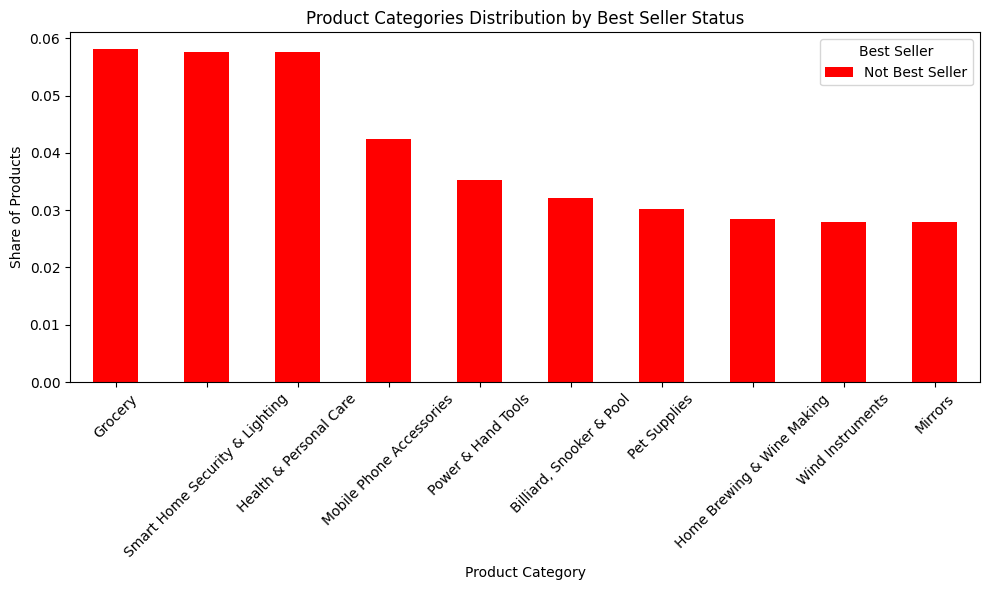

In [44]:
cross_category_bestseller[["best_seller_share"]].plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Chart customization
plt.title('Product Categories Distribution by Best Seller Status')
plt.xlabel('Product Category')
plt.ylabel('Share of Products')
plt.xticks(rotation=45)
plt.legend(title='Best Seller', labels=['Not Best Seller', 'Best Seller'])

# Display the chart
plt.tight_layout()
plt.show()

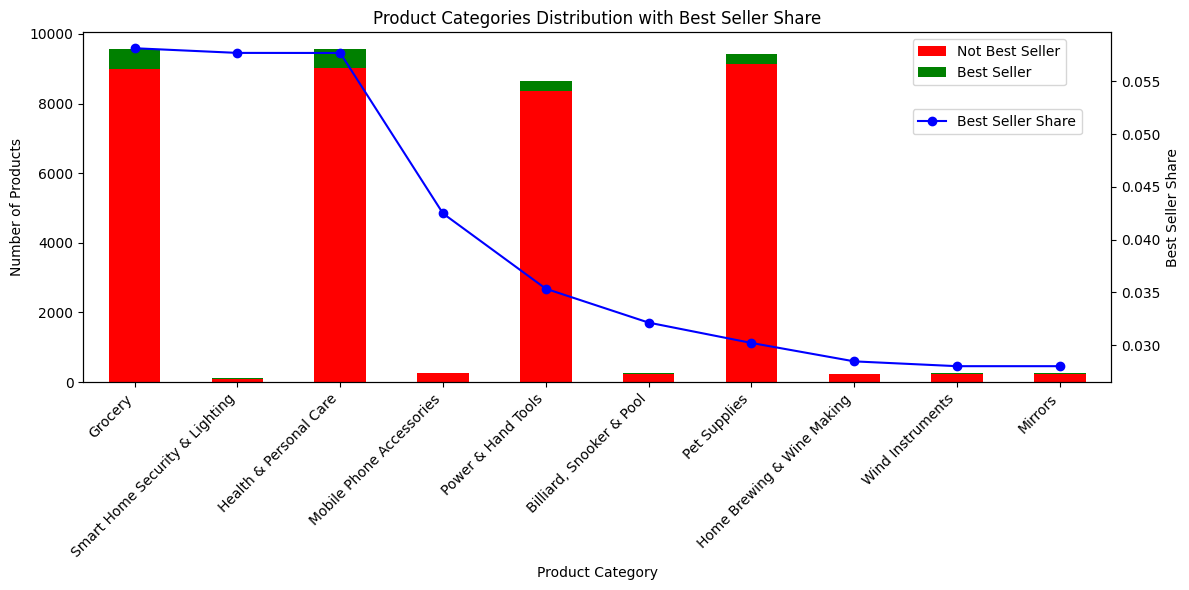

In [45]:

# Rename columns to avoid confusion with boolean values
cross_category_bestseller = cross_category_bestseller.rename(columns={False: "Not Best Seller", True: "Best Seller"})

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stacked bar chart
cross_category_bestseller[["Not Best Seller", "Best Seller"]].plot(
    kind="bar", stacked=True, color=['red', 'green'], ax=ax1
)

# Create secondary axis for best_seller_share line
ax2 = ax1.twinx()
ax2.plot(cross_category_bestseller.index, cross_category_bestseller["best_seller_share"], 
         marker="o", linestyle="-", color="blue", label="Best Seller Share")

# Labels and styling
ax1.set_xlabel("Product Category")
ax1.set_ylabel("Number of Products")
ax1.set_title("Product Categories Distribution with Best Seller Share")


# Positioning the legends outside the plot to avoid overlap
ax1.legend(["Not Best Seller", "Best Seller"], loc="upper left", bbox_to_anchor=(0.8, 1))
ax2.set_ylabel("Best Seller Share")
ax2.legend(loc="upper left", bbox_to_anchor=(0.8, 0.8))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

## 0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [49]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers, lower_bound, upper_bound

In [51]:
data_series = df['price']  
outliers, lower_bound, upper_bound = tukeys_test_outliers(data_series)
df_price_norm = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_price_norm

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


## 1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.


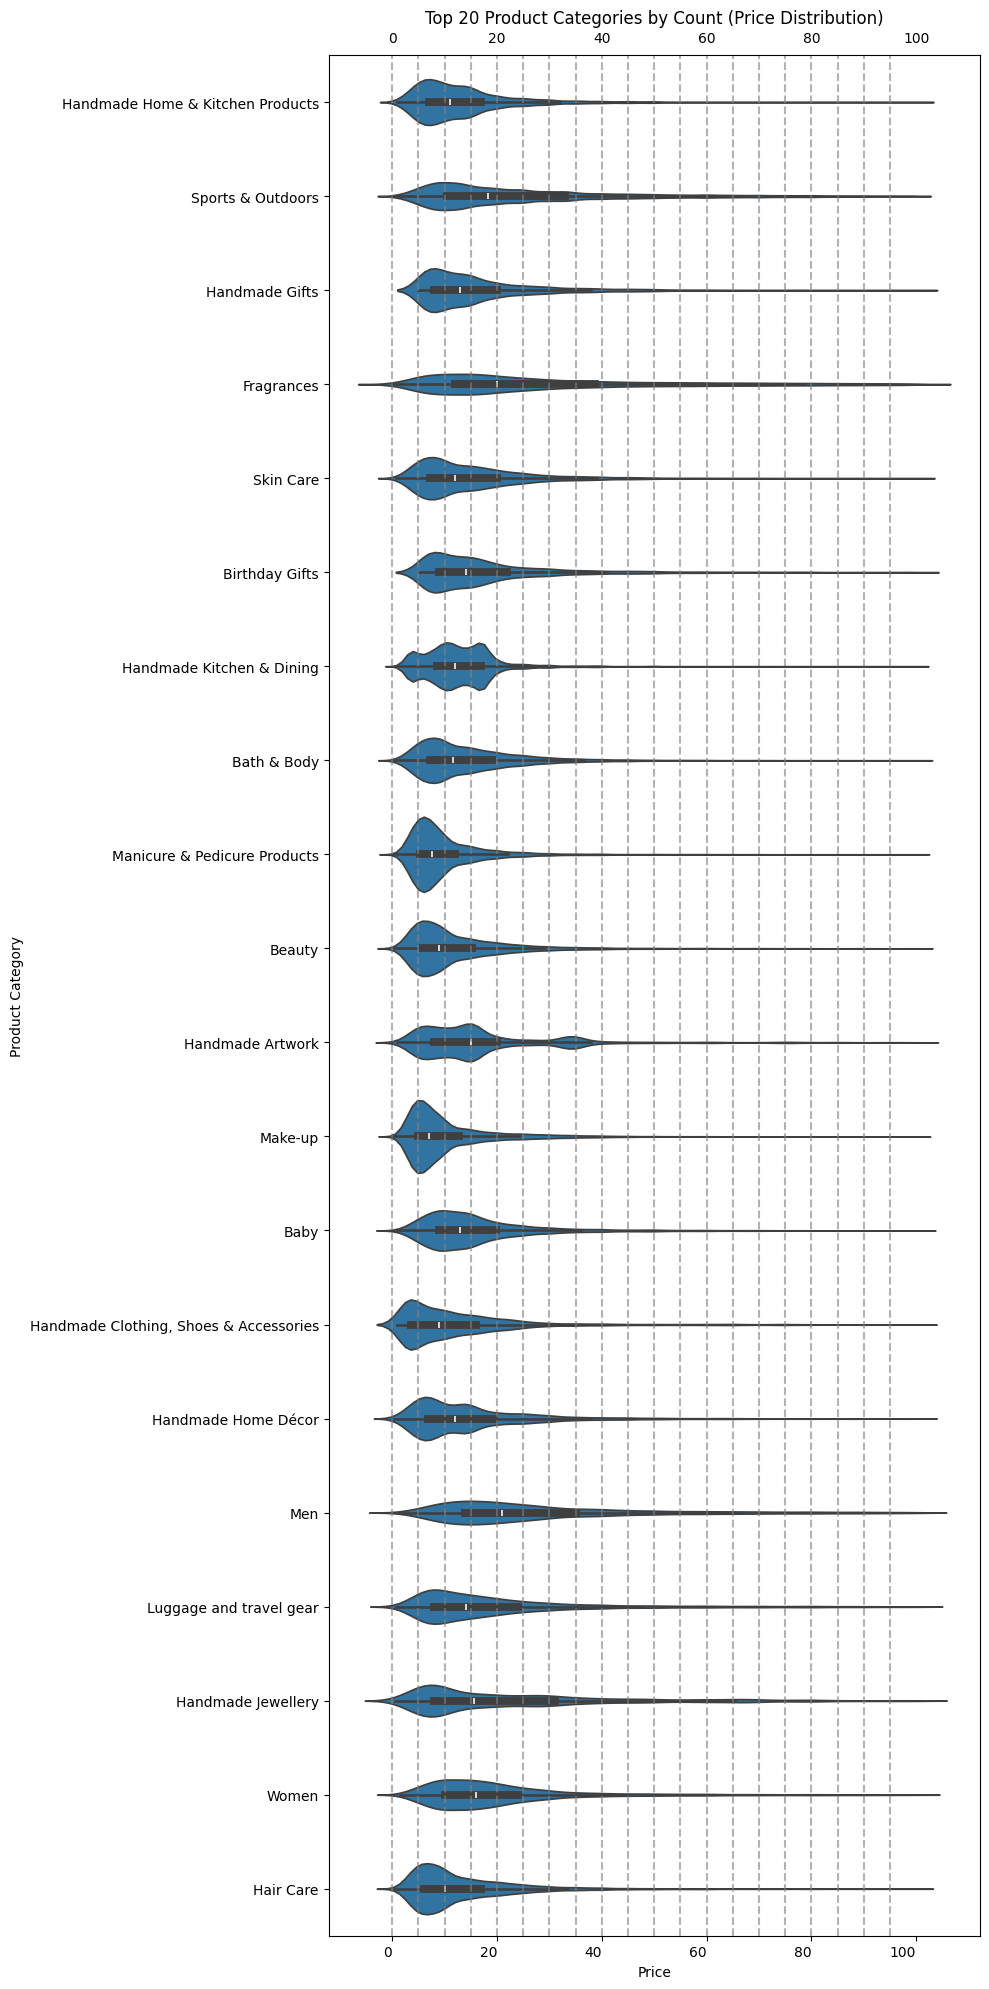

The product category with the highest median price is: Desktop PCs
The highest median price is: 74.0


In [66]:
# Filtering the top 20 categories by count for better visualization
top_20_categories = df_price_norm['category'].value_counts().nlargest(20).index
filtered_df = df_price_norm[df_price_norm['category'].isin(top_20_categories)]

# Plot with the top 20 categories (
plt.figure(figsize=(10, 20))
sns.violinplot(y='category', x='price', data=filtered_df)

# Adding vertical lines every 5 units across the X-axis
max_price = df_price_norm['price'].max()  # Get the maximum price for the range
for x in range(0, int(max_price) + 1, 5):  # Adding lines with step of 5
    plt.axvline(x=x, color='gray', linestyle='--', alpha=0.6)

# Adding title and labels
plt.title('Top 20 Product Categories by Count (Price Distribution)')
plt.ylabel('Product Category')
plt.xlabel('Price')

# Rotating Y-axis labels for better readability
plt.yticks(rotation=0)

# Adding X-axis labels at both the top and bottom of the plot
plt.xticks(ha="right")  # For bottom ticks
plt.gca().tick_params(axis='x', labeltop=True, labelbottom=True)  # Display labels on both top and bottom

plt.tight_layout()
plt.show()

# Analyzing the median price by category (for all categories, without filtering)
median_prices = df_price_norm.groupby('category')['price'].median()
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"The product category with the highest median price is: {highest_median_price_category}")
print(f"The highest median price is: {highest_median_price}")



Which product category tends to have the highest median price? 
- According to the graphic, Fragrances, Sports & Outdoors, and Men are the categories with the highest median price.

## 2. Bar Charts:
Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

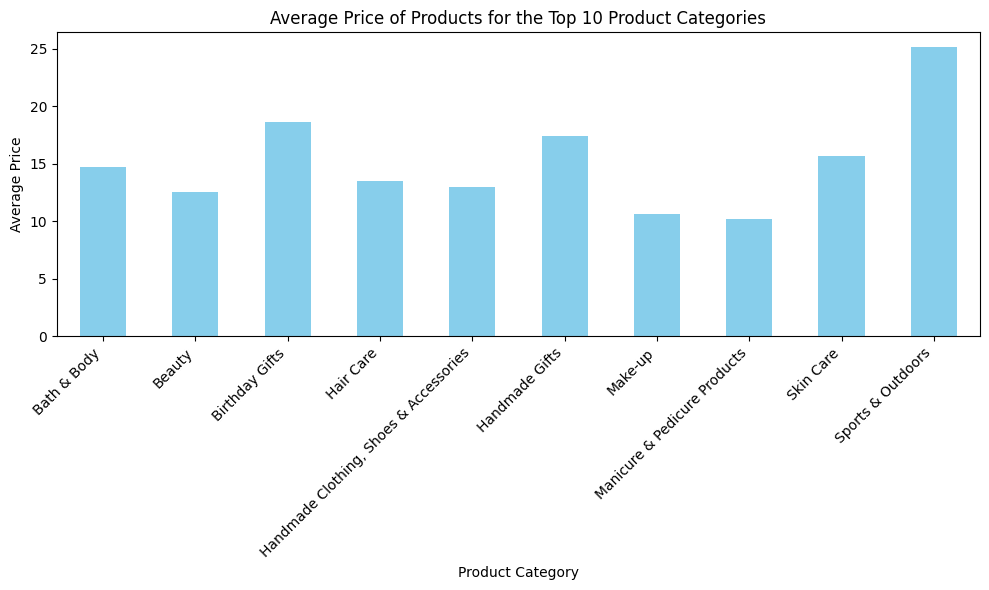

In [67]:
# Filtering the top 10 categories by count
top_10_categories = df_price_norm['category'].value_counts().nlargest(10).index
filtered_df = df_price_norm[df_price_norm['category'].isin(top_10_categories)]

# Calculate the average price for each of the top 10 categories
avg_prices = filtered_df.groupby('category')['price'].mean()

# Create a bar chart to compare the average price of products for the top 10 categories
plt.figure(figsize=(10, 6))
avg_prices.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Average Price of Products for the Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')

# Rotating X-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


Which product category commands the highest average price? Don't filter here by top categories.
- The highest average price is found in the Sports & Outdoors, Handmade, and Beauty gifts categories.

## 3.Box Plots:
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.


/var/folders/hg/7_xt468j3nz1xqspwcc6s8jw0000gn/T/ipykernel_97176/4108567864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=filtered_df, palette='Set2')


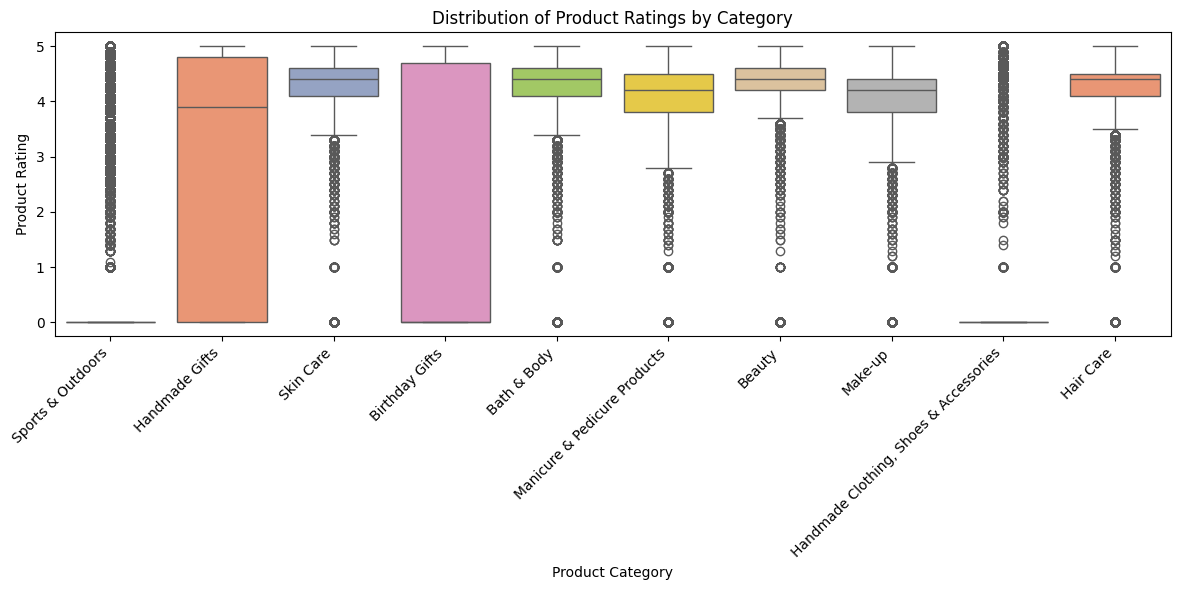

In [70]:
# Filtering the top 10 categories by count
top_10_categories = df_price_norm['category'].value_counts().nlargest(10).index
filtered_df = df_price_norm[df_price_norm['category'].isin(top_10_categories)]

# Create side-by-side box plots for product ratings based on category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=filtered_df, palette='Set2')

# Adding title and labels
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Product Rating')

# Rotating X-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Display the plot
plt.tight_layout()
plt.show()


Which category tends to receive the highest median rating from customers? Don't filter here by top categories?
- Beaty, Bath and Body and Skin Care

# Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

## 1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [71]:
correlation = df_price_norm['price'].corr(df_price_norm['stars'])
print(f"The correlation coefficient between price and stars is: {correlation:.2f}")

The correlation coefficient between price and stars is: -0.08


A correlation coefficient of -0.08 suggests a very weak negative correlation between price and stars. This means that as the price increases, the rating (stars) slightly tends to decrease, but the relationship is so weak that it’s almost negligible.

### 3. Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


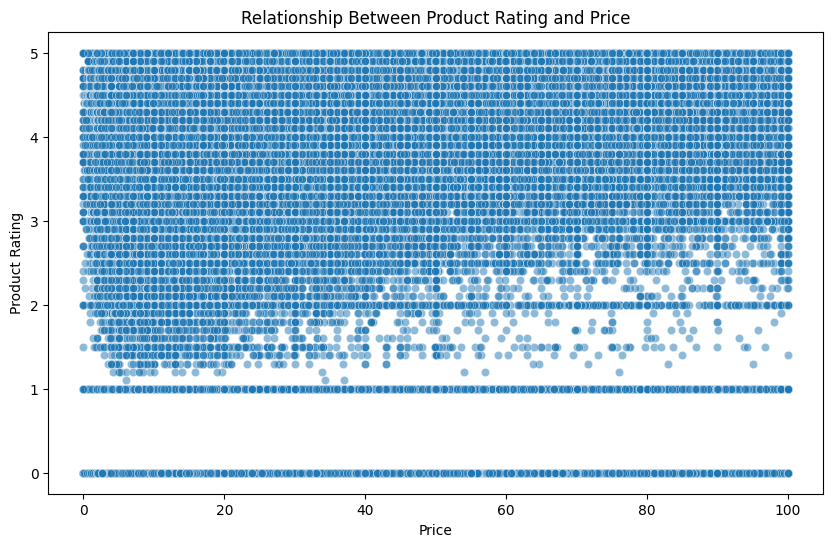

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_price_norm['price'], y=df_price_norm['stars'], alpha=0.5)

# Titles and labels
plt.title('Relationship Between Product Rating and Price')
plt.xlabel('Price')
plt.ylabel('Product Rating')

# Show plot
plt.show()

1. Most ratings are clustered around 4-5 stars – The majority of products have high ratings, with many points densely packed near the top.
2. Some low-rated products exist across all price ranges – There are a significant number of products with ratings between 0 and 2 stars, but they appear less frequently than higher-rated ones.
3. Higher prices do not necessarily correlate with higher ratings – The distribution of ratings appears relatively uniform across different price points, supporting the weak negative correlation (-0.08) between price and rating.
4. Dense concentration of ratings at specific values – Many products have exact ratings of 1, 2, 3, 4, or 5, likely due to the nature of star-based rating systems.

Use a correlation heatmap to visualize correlations between all numerical variables.

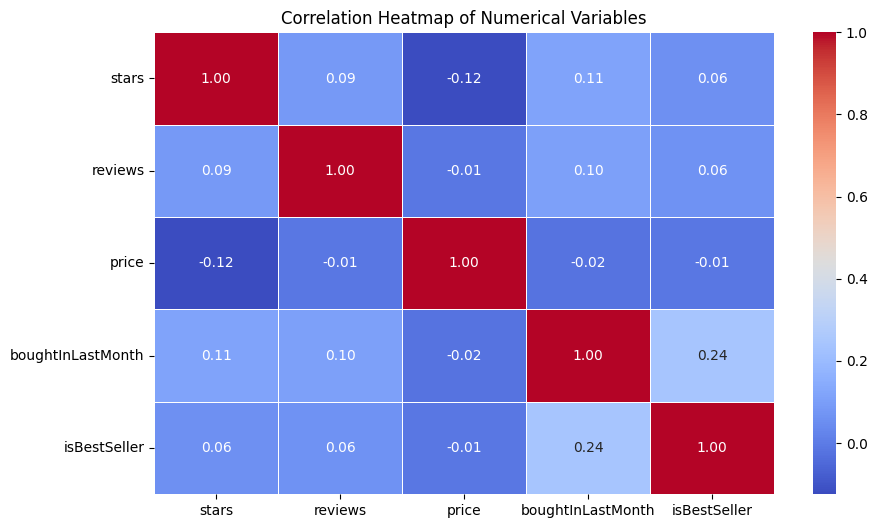

In [74]:
# Select only numerical columns
numerical_columns = ['stars', 'reviews', 'price', 'boughtInLastMonth', 'isBestSeller']

# Ensure 'isBestSeller' is numeric
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Numerical Variables")

plt.show()


Examine if product prices typically follow a normal distribution using a QQ plot.

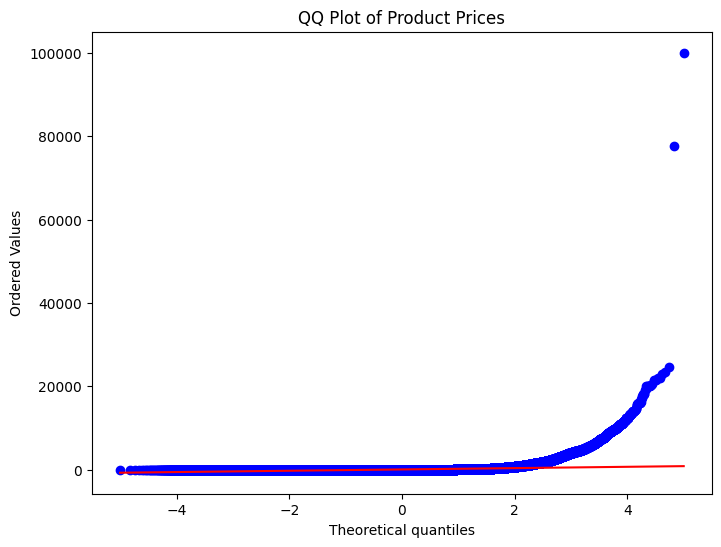

In [75]:

# Filter out non-positive prices (if any) for better visualization
df_filtered = df[df['price'] > 0]

# Generate QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df_filtered['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.show()

Conclusions from the QQ Plot
Severe Right-Skewness:

The data points deviate significantly from the red reference line, especially on the right side.
This suggests that product prices are not normally distributed but rather highly skewed, with a long right tail.
A few extreme outliers (very expensive products) are pulling the distribution to the right.
Majority of Prices Clustered Near Zero:

Most of the points lie close to zero, meaning many products have relatively low prices.
The extreme outliers at the top suggest a small number of very high-priced products.